In [2]:
from DB.database import Database
from DB.model import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from sqlalchemy.orm import joinedload

In [13]:
db = Database('sqlite:///../yelp.db')
db.__enter__()
users = db.session.query(model.User)\
                .all()
            #.options(joinedload(model.User.elite_years))\
            #.options(joinedload(model.User.friends))\
            #.options(joinedload(model.User.friended))\
            #.options(joinedload(model.User.reviews))
            #.options(joinedload(model.User.tips))\
            #.all()

## Basic user table statistics
All colors represent the same attribute, they only differ in their resolution.
Note the logarithmic scale.

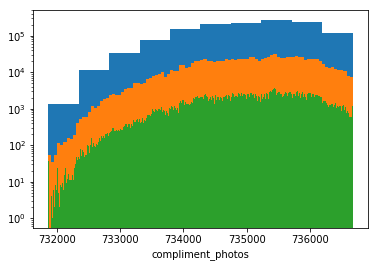

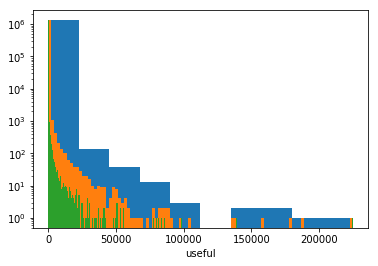

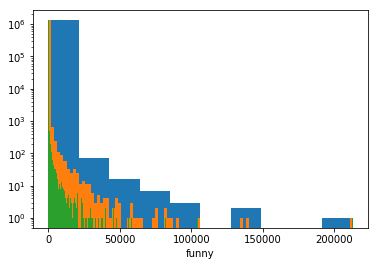

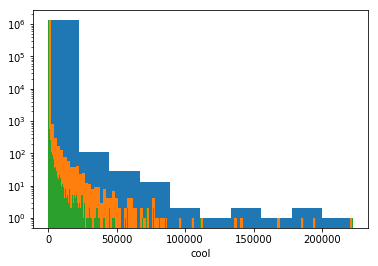

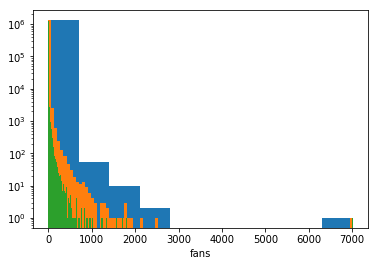

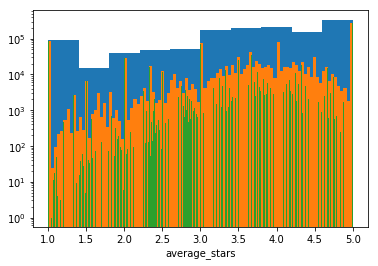

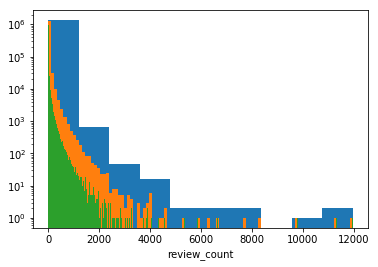

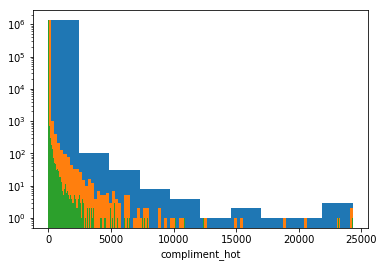

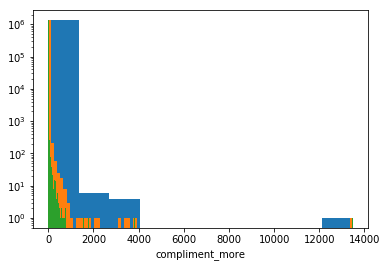

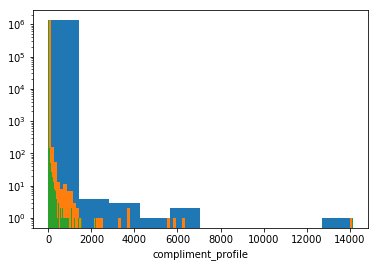

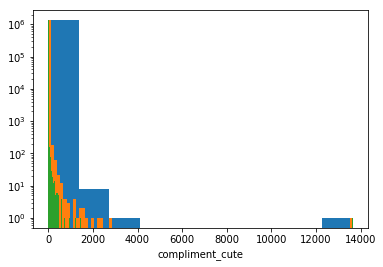

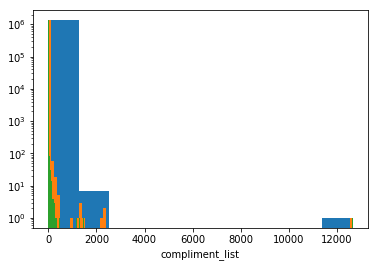

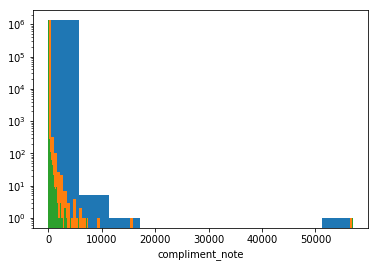

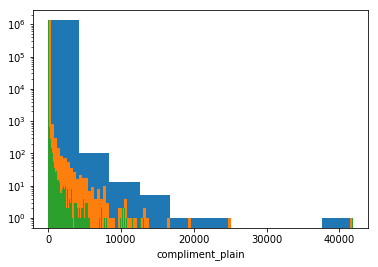

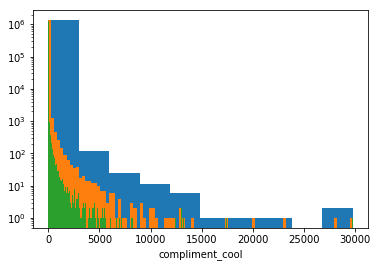

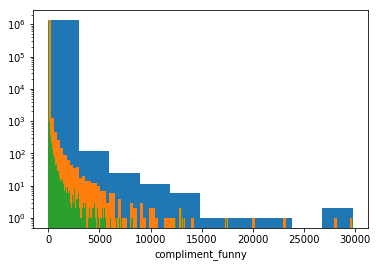

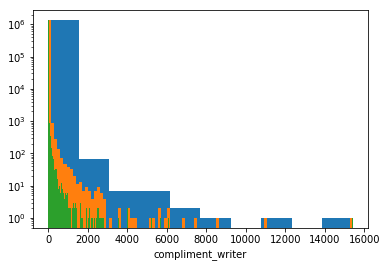

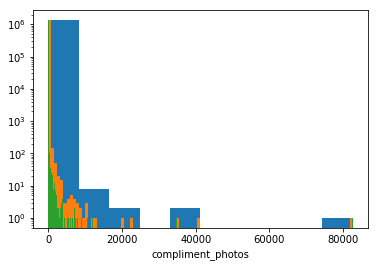

<Figure size 432x288 with 0 Axes>

In [11]:
attributes = ['useful', 'funny', 'cool', 'fans', 'average_stars',
              'review_count' , #'yelping_since',
              'compliment_hot' , 'compliment_more', 'compliment_profile',
              'compliment_cute' , 'compliment_list', 'compliment_note',
              'compliment_plain' , 'compliment_cool', 'compliment_funny',
              'compliment_writer' , 'compliment_photos']
def hist_plt(values, name):
    plt.yscale('log')
    plt.xlabel(att)
    plt.hist(values, 10)
    plt.hist(values, 100)
    plt.hist(values, 1000)
    plt.show()
    plt.clf()
    
hist_plt(date2num([getattr(u, 'yelping_since') for u in users]), 'yelping_since')
for att in attributes:
    values = np.array([getattr(u, att) for u in users])
    hist_plt(values, att)

In [ ]:
return
funcs = [lambda u: len(u.elite_years), lambda u: len(u.tips),
         lambda u: len(u.friends), lambda u: len(u.friended)]
names = ['num elite_years', 'num reviews', 'num tips', 'num friends', 'num friended']
for i in range(len(funcs)):
    values = np.array([funcs[i](u) for u in users])
    plt.yscale('log')
    plt.xlabel(names[i])
    plt.hist(values, 10)
    plt.hist(values, 100)
    plt.hist(values, 1000)
    plt.show()
    plt.clf()

In [6]:
print(type(users[0].yelping_since))

<class 'datetime.datetime'>


In [5]:
import time

In [41]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .limit(100000).yield_per(10):
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

69.5778911113739
3688892


In [42]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .limit(100000):
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

89.72778606414795
3688892


In [43]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .limit(100000).all():
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

87.19612669944763
3688892


In [44]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .options(joinedload(model.User.friends))\
                .limit(100000).all():
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

107.77840209007263
3688892


In [45]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .limit(100000)\
                .from_self()\
                .outerjoin(model.User.friends)\
                .all():
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

122.79576873779297
3688892


In [46]:
start = time.time()
c = 0
with Database('sqlite:///../yelp.db') as db2:
    for user in db2.session.query(model.User)\
                .limit(100000)\
                .from_self()\
                .outerjoin(model.User.friends):
        for f in user.friends:
            c += 1
print(time.time() - start)
print(c)

119.25250482559204
3688892
